## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>
## <font color=red> Please don't rename this .ipynb file.</font><br>
- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy import linalg

## Please make sure that your code works with loading data from relative path only

i.e. ```pd.read_csv('./data/multi_var_lasso.csv')``` should not throw an error when we run the auto-grading scripts

In [2]:
data_multi = pd.read_csv('./data/multi_var_lasso.csv')
cols = [f"x_gt_{idx}" for idx in range(1, 6)]
X_multi = np.array(data_multi[cols])
Y_multi = np.array(data_multi['y_gt'])

In [3]:
data_multi_class = pd.read_csv('./data/3_class_perceptron.csv')
cols = [f"x_gt_{idx}" for idx in range(1, 3)]
X_multi_class = np.array(data_multi_class[cols])
Y_multi_class = np.array(data_multi_class['y_gt'])

In [4]:
def mse_multi_var(X, Y, w, b):
    '''
    Compute mean squared error between predictions and true y values

    Args:
    X - numpy array of shape (n_samples, 1)
    Y - numpy array of shape (n_samples, 1)
    w - a float
    b - a float
    '''

    ## TODO

    n_samples = X.shape[0]
    mse = np.sum(np.square((X @ w + b)- Y))
    mse = mse/ n_samples
    
    ## END TODO

    return mse

In [5]:
def mse_regularized(X, Y, w, b, lamda):
    '''
    Compute mean squared error between predictions and true y values

    Args:
    X - numpy array of shape (n_samples, 1)
    Y - numpy array of shape (n_samples, 1)
    w - a float
    b - a float
    '''
    ## TODO
    
    n_samples = X.shape[0]
    mse = np.sum(np.square((X @ w + b)- Y))
    mse = mse/ n_samples
    mse = mse + lamda*(np.sum(np.absolute(w)))

    ## END TODO

    return mse

## Plot Graphs

- This function plots the ground truth curve in <font color=green>green</font> and the predicted function in <font color=red>red</font>

In [6]:
def plot_curves(w, b, x, y):
  x_gt = np.linspace(-1, 2, 50)
  y_gt = 1 - 3 * x_gt - 2 * x_gt ** 2 + 2.5 * x_gt ** 3
  # print(x_gt.shape,y_gt.shape)
  if len(w) == 1:
    y_fit = w * x_gt + b
  elif len(w) == 5:
    x_fit = x_gt
    for pow in range(2, 4):
      x_fit = np.vstack([x_fit, np.power(x_gt, pow)])

    x_fit = np.vstack([x_fit, np.power(x_gt, 2)])
    x_fit = np.vstack([x_fit, np.power(x_gt, 1)])
    
    y_fit = np.dot(w, x_fit) + b
  else:
    assert False, 'Pass a valid w'
  plt.plot(x_gt, y_gt, color="green", label='1 - 3 * x - 2 * x ** 2 + 2.5 * x ** 3')
  plt.plot(x_gt, y_fit, color='red', label="Fitted Function y = w.Tx + b")
  if len(x.shape) == 1:
    x_plot = np.vstack([x, np.ones(len(x))]).T
    # print (x_plot.shape, y.shape)
  else:
    x_plot = x
  plt.scatter(x_plot[:,0],y)
  plt.legend()
  plt.title("Ground Truth Function")
  plt.show()

In [7]:
def split_data(X, Y, train_ratio=0.6):
    '''
    Split data into train and validation sets
    The first floor(train_ratio*n_sample) samples form the train set
    and the remaining the test set

    Args:
    X - numpy array of shape (n_samples, n_features)
    Y - numpy array of shape (n_samples, 1)
    train_ratio - fraction of samples to be used as training data

    Returns:
    X_train, Y_train, X_val, Y_val
    '''
    ## TODO
    n_samples = X.shape[0]
    S = np.arange(n_samples)
    np.random.shuffle(S)
    X_ = X[S]
    Y_ = Y[S]

    dim = X_.ndim
    if dim  ==1:
      X_ = X_.reshape(-1, 1)

    train_size = int(np.floor(n_samples*train_ratio))
    X_train = X_[:train_size,:]
    Y_train = Y_[:train_size]
    X_val = X_[train_size:,:]
    Y_val = Y_[train_size:]
    
    ## END TODO

    return X_train, Y_train, X_val, Y_val

# Lasso Regression

Validation loss if 4.265231717646271
Training Loss loss if 4.115812566109785
(5,) 0.33851236006103813 (30, 5) (30,)


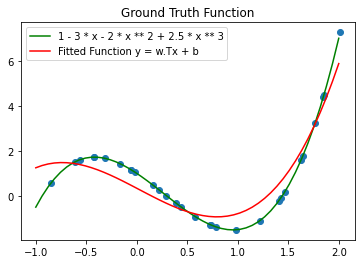

(array([-1.17753314, -0.05482084,  1.33580519, -0.05482084, -1.17753314]),
 0.33851236006103813)

In [8]:
X_train, Y_train, X_val, Y_val = split_data(X_multi, Y_multi, train_ratio=0.6)

def ista(X_train, Y_train, X_val, Y_val, epochs=100, lr=1e-3, lamda = 1):
    '''
    Perform multi variable lasso regression using ISTA

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    epochs - number of gradient descent steps
    lr - learnig rate
    lamda - regularization_weight
    '''

    w = np.zeros(X_train.shape[1]) #np.random.randn(X_train.shape[1])
    b = 0
    ## TODO
    

    n_samples_train = X_train.shape[0]

    for i in range(epochs):
      err_train = (X_train @ w + b) - Y_train

      del_mse_w = 2*( X_train.T @ err_train)
      w_t = w - lr*del_mse_w

      w_f = np.zeros(w.shape)
      gret = w_t > lr*lamda
      less = w_t < -1*lr*lamda
      w_f[gret] = w_t[gret] - lr*lamda
      w_f[less] = w_t[less] + lr*lamda

      w = w_f

      del_mse_b = 2*(np.sum(err_train))
      b_t = b- lr*del_mse_b

      b_f = 0.0
      if b_t > lr*lamda:
        b_f = b_t - lr*lamda 
      elif b_t < -1*lr*lamda:
        b_f = b_t + lr*lamda

      b = b_f 



    ## END TODO
    
    mse_train = mse_regularized(X_train, Y_train, w, b, lamda)
    mse_val = mse_regularized(X_val, Y_val, w, b, lamda)
    print(f'Validation loss if {mse_val}')
    print(f'Training Loss loss if {mse_train}')
    print(w.shape,b,X_train.shape,Y_train.shape)
    plot_curves(list(w), b, X_train, Y_train)
    return w, b

ista(X_train, Y_train, X_val, Y_val)

# Ridge Regression

Validation loss if 1.4885064192132798
Training Loss loss if 1.0748104853802822


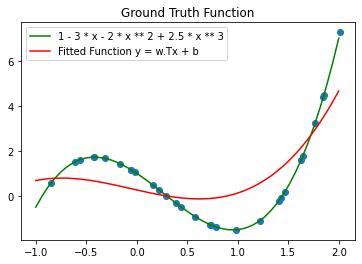

(array([-0.50446957,  0.06968963,  0.73210416,  0.06968963, -0.50446957]),
 0.26391867819152315)

In [9]:
def multivar_reg_closedform(X_train, Y_train, X_val, Y_val, lamda=0.5):

    '''
    Perform L2 regularized multi variable least squares regression using 
    closed form update rules

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    lambda - regularization weight
    '''

    w = np.zeros(X_train.shape[1])
    b = 0

    ## TODO     #use closed-form solution from previous assignment

    n_samples_train = X_train.shape[0]

    X_mean = X_train.mean(axis= 0, keepdims= True)
    X_req  = X_train - X_mean
    i_mat = np.identity(X_train.shape[1], float)
    xr_T_xr_lI = X_req.T @ X_req + n_samples_train*lamda*i_mat
    xr_T_Y = X_req.T @ Y_train
    w = (np.linalg.inv(xr_T_xr_lI)) @ xr_T_Y
    b_mat = Y_train - X_train @ w
    b = np.mean(b_mat)



    ## END TODO

    mse_train = mse_multi_var(X_train, Y_train, w, b)
    mse_val = mse_multi_var(X_val, Y_val, w, b)
    print(f'Validation loss if {mse_val}')
    print(f'Training Loss loss if {mse_train}')
    plot_curves(list(w), b, X_train, Y_train)
    
    return w, b

multivar_reg_closedform(X_train, Y_train, X_val, Y_val)

Validation loss if 2.1252041159493436
Training Loss loss if 1.0118866464535248


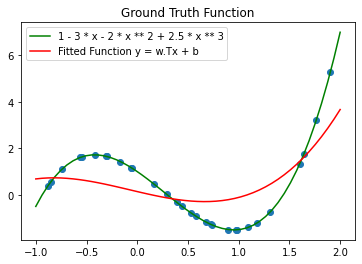

Validation loss if 4.182481077982505
Training Loss loss if 3.888112395749294
(5,) 0.20968153952630025 (30, 5) (30,)


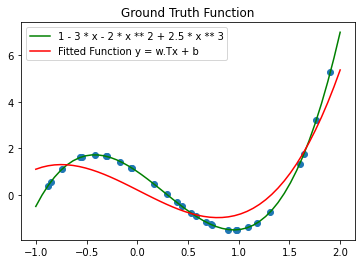

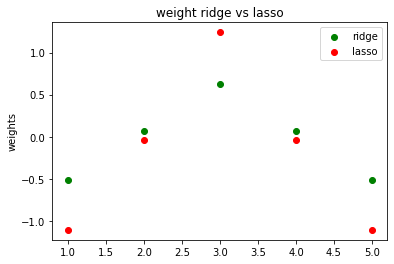

In [62]:
#Q-2.2 : part-3
w_r, b_r = multivar_reg_closedform(X_train, Y_train, X_val, Y_val)
w_l, b_l = ista(X_train, Y_train, X_val, Y_val)
np.append(w_r, b_r)
np.append(w_l, b_l)
x_leb = np.array([1,2,3,4,5])
# print(w_r)
# print(w_l)
plt.scatter(x_leb, w_r, label="ridge", c ="green")
plt.scatter(x_leb, w_l, label="lasso", c ="red")
plt.ylabel("weights")
plt.title('weight ridge vs lasso')
plt.legend()

# Bias-Variance Tradeoff

In [99]:
#
def ridge(X_train, Y_train, X_test, epochs=20, lr=2e-1, lamda = 1):

    w = 0.6
    b = 2
    n = float(len(X_train)) # Number of elements in X

    # Performing Gradient Descent 

    ## TODO

    for i in range(epochs):
      err_train = (X_train * w + b) - Y_train

      del_mse_w = 2*((X_train.T @ err_train)/n + lamda*w) 
      w = w - lr*del_mse_w

      del_mse_b = 2*(np.sum(err_train))/n
      b = b- lr*del_mse_b

    ### END TODO

    Y_pred = w*X_test+b
    return Y_pred

def lasso(X_train, Y_train, X_test,epochs=20, lr=2e-1, lamda = 1):
    w = 0.6
    b = 2
    n = float(len(X_train)) # Number of elements in X

    # Performing Gradient Descent 
    ##TODO
    for i in range(epochs):
      err_train = (X_train * w + b) - Y_train

      del_mse_w = 2*( X_train.T @ err_train)
      w_t = w - lr*del_mse_w

      w_f = 0.0
      if w_t > lr*lamda:
        w_f = w_t - lr*lamda
      elif w_t < -1*lr*lamda:
        w_f = w_t + lr*lamda

      w = w_f

      del_mse_b = 2*(np.sum(err_train))
      b_t = b- lr*del_mse_b

      b_f = 0.0
      if b_t > lr*lamda:
        b_f = b_t - lr*lamda 
      elif b_t < -1*lr*lamda:
        b_f = b_t + lr*lamda

      b = b_f 

    ##END TODO

    Y_pred = w*X_test+b
    return Y_pred

def ols(X_train, Y_train, X_test,epochs=20, lr=2e-1):

    w = 0.6
    b = 2
    n = float(len(X_train)) # Number of elements in X

    # Performing Gradient Descent 
    ## TODO

    for i in range(epochs):
      err_train = (X_train*w + b) - Y_train

      del_mse_w = 2*(np.sum(err_train.T @ X_train))/n
      w = w - lr*(del_mse_w)

      del_mse_b = 2*(np.sum(err_train))/n
      b = b - lr*del_mse_b

    ### END TODO

    Y_pred = w*X_test+b
    return Y_pred

In [11]:
# We fit multiple lines onto our linear model defined by y = c + mx + error.
num_lines = 10
#size of Dataset, len(Dataset) for 1 line
n = 500
#weights (slope/intercept)
c = 3
m = 5

In [12]:
def gen_data():
    '''
    We sample n, X from uniform distribution and error from zero mean normal distribtion, we find Y using mx+c+e
    We do the above for num_lines number of time, to fit different lines for each models(lasso, ols, ridge), doing so will
    be helpfull in calculating Expected value of learned esitmator of all n*num_lines dataset

    DO NOT CHANGE this function.
    '''

    w0 = c
    w1 = m
    data = np.zeros(shape=(num_lines,n,2))
    for i in range(num_lines):
        x = np.random.uniform(-2, 2, size=(n, 1))
        e = np.random.normal(0, 8, size=(n, 1))
        y = w0 + w1 * x + e
        x_y = np.concatenate((x, y), axis=1)
        data[i,:,:] = x_y
    return np.array(data)

In [78]:
def gen_bais_variance(Y_preds, Y_true):
    ## TODO
    # (n,m) = Y_preds.shape
    E_Y_pred = np.mean(Y_preds, axis=0).reshape(1,-1)
    bias =(E_Y_pred - Y_true)

    # assert(E_Y_pred.shape == (1,m))

    var = (E_Y_pred - Y_preds)
    variance = var**2
    variance = np.mean(variance, axis=0)

    # print("Y_preds.shape =", Y_preds.shape)
    # print("E_Y_pred.shape =", E_Y_pred.shape)
    # print("var.shape =", var.shape)
    # print("variance.shape =", variance.shape)

    ## END TODO
    return bias, variance

In [66]:
def make_prediction(data, X_test, lambda_=0.5):

  y_hat = np.zeros(shape=(num_lines, 3))#store prediction of all model

  for i in range(num_lines):
      X = data[i, :, 0].reshape(n ,1)
      y = data[i, :, 1].reshape(n, 1)

      y_hat[i, 0] = ols(X, y, X_test)

      y_hat[i, 1] = ridge(X, y, X_test, lamda = lambda_)

      y_hat[i, 2] = lasso(X, y, X_test, lamda = lambda_)

  return y_hat

In [67]:
def plot_figure(l,b,v):

  plt.plot(l, b[:, 0], label="OLS")
  plt.plot(l, b[:, 1], label="Ridge")
  plt.plot(l, b[:, 2], label="Lasso")
  plt.xlabel("Regularization coefficient")
  plt.ylabel("Bias")
  plt.title("Bias vs Lambda")
  plt.legend(loc="upper left")
  plt.show()

  plt.plot(l, v[:, 0], label="OLS")
  plt.plot(l, v[:, 1], label="Ridge")
  plt.plot(l, v[:, 2], label="Lasso")
  plt.xlabel("Regularization coefficient")
  plt.ylabel("Variance")
  plt.title("Variance vs Lambda")
  plt.legend(loc="lower left")
  plt.show()



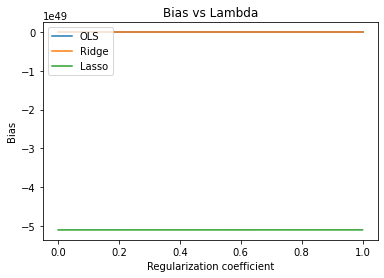

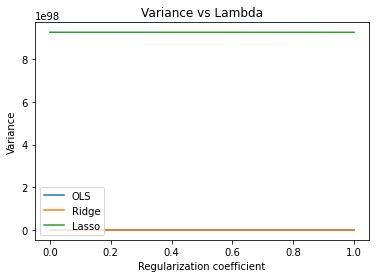

In [100]:
def driver():
  all_lambda = np.linspace(0.0001, 1, 100)
  all_bias = np.zeros(shape=(len(all_lambda), 3))
  all_variance = np.zeros(shape=(len(all_lambda), 3))
  dataset = gen_data()
  X_test = np.array([4]).reshape((1,1))
  for i, l in enumerate(all_lambda):
      Y_hat = make_prediction(dataset, X_test, lambda_=l)
      ##TODO #calculate true mean Y_true

      Y_true = m*X_test + c

      # print(Y_hat.shape, Y_true.shape)
      ##END TODO
      all_bias[i, :], all_variance[i, :] = gen_bais_variance(Y_hat, Y_true)
  plot_figure(all_lambda, all_bias, all_variance)


driver()

# Perceptron

In [53]:
X_train_multiclass, Y_train_multiclass, X_val_multiclass, Y_val_multiclass = split_data(X_multi_class, Y_multi_class, train_ratio=0.6)

def perceptron_algo(X_train_multiclass, Y_train_multiclass, X_val_multiclass, Y_val_multiclass,n_class=3, epochs=30):
  W=np.zeros((n_class, len(X_train_multiclass[0]) ))
  ## TODO

  for _ in range(epochs):
    for i in range(X_train_multiclass.shape[0]):
      x_i = X_train_multiclass[i]
      y_i = Y_train_multiclass[i]
      
      scores = W @ x_i.reshape(-1, 1)
      y_p = np.argmax(scores)
      
      if y_p != y_i:
        W[y_i, :] = W[y_i, :] + X_train_multiclass[i]
        W[y_p, :] = W[y_p, :] - X_train_multiclass[i]
  

  ##END TODO

  Y_pred=list()
  for i in range(len(Y_val_multiclass)):
      y_pred=np.argmax([np.dot(W[0],X_val_multiclass[i]),np.dot(W[1],X_val_multiclass[i]),np.dot(W[2],X_val_multiclass[i])])
      Y_pred.append(y_pred)

  from sklearn.metrics import classification_report
  target_names = ['class 0', 'class 1', 'class 2']
  print(classification_report(Y_val_multiclass, Y_pred, target_names=target_names))
  return W

perceptron_algo(X_train_multiclass, Y_train_multiclass, X_val_multiclass, Y_val_multiclass)


              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        17
     class 1       1.00      0.80      0.89        10
     class 2       0.87      1.00      0.93        13

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.94        40
weighted avg       0.96      0.95      0.95        40



array([[ 11.41666711,  12.24590122],
       [ -7.98435916,   0.5536833 ],
       [ -3.43230795, -12.79958453]])